In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [16]:
df = pd.read_csv('./data/psn.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Quarterly Revenue,Annual Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,0,Delux,8000,20000,62000,26-01-22,16-12-22,United States,29,Male,PS5,3 Month
1,1,Delux,7500,18800,60000,13-03-25,03-01-26,Japan,14,Male,PS5_PRO,1 Month
2,2,Delux,9000,22000,65000,10-07-21,12-10-21,United States,50,Male,PS5,12 Month
3,3,Essential,7500,18800,60000,28-04-21,06-07-21,Indonesia,28,Male,PS5,1 Month
4,4,Delux,9000,22000,65000,24-03-18,23-12-18,Germany,23,Male,PS4,12 Month


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   User ID            int64 
 1   Subscription Type  object
 2   Monthly Revenue    int64 
 3   Quarterly Revenue  int64 
 4   Annual Revenue     int64 
 5   Join Date          object
 6   Last Payment Date  object
 7   Country            object
 8   Age                int64 
 9   Gender             object
 10  Device             object
 11  Plan Duration      object
dtypes: int64(5), object(7)
memory usage: 1.8+ GB


,User ID,Monthly Revenue,Quarterly Revenue,Annual Revenue,Age
count,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07
mean,1.000000e+07,8.166807e+03,2.026696e+04,6.233378e+04,3.043318e+01
std,5.773503e+06,6.236571e+02,1.320027e+03,2.054946e+03,9.040691e+00
min,0.000000e+00,7.500000e+03,1.880000e+04,6.000000e+04,1.400000e+01
25%,5.000000e+06,7.500000e+03,1.880000e+04,6.000000e+04,2.300000e+01
50%,1.000000e+07,8.000000e+03,2.000000e+04,6.200000e+04,3.000000e+01
75%,1.500000e+07,9.000000e+03,2.200000e+04,6.500000e+04,3.700000e+01
max,2.000000e+07,9.000000e+03,2.200000e+04,6.500000e+04,5.000000e+01


In [18]:
df2 = df.drop(['User ID'], axis =1)

In [19]:
df2.columns

Index(['Subscription Type', 'Monthly Revenue', 'Quarterly Revenue',
       'Annual Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age',
       'Gender', 'Device', 'Plan Duration'],
      dtype='object')

In [ ]:
df2["Monthly Revenue"] = df2["Monthly Revenue"].astype(str).str.replace(",", "").astype(float)
df2["Quarterly Revenue"] = df2["Quarterly Revenue"].astype(str).str.replace(",", "").astype(float)
df2["Annual Revenue"] = df2["Annual Revenue"].astype(str).str.replace(",", "").astype(float)

df2.loc[df2["Plan Duration"] == "3 Month", "Monthly Revenue"] = df2["Quarterly Revenue"]
df2.loc[df2["Plan Duration"] == "12 Month", "Monthly Revenue"] = df2["Annual Revenue"]

df2 = df2.drop(columns=["Quarterly Revenue", "Annual Revenue"])

df2.head()
# df2.to_csv("./data/psn_dataset_2.csv", index=False)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Delux,20000.0,26-01-22,16-12-22,United States,29,Male,PS5,3 Month
1,Delux,7500.0,13-03-25,03-01-26,Japan,14,Male,PS5_PRO,1 Month
2,Delux,65000.0,10-07-21,12-10-21,United States,50,Male,PS5,12 Month
3,Essential,7500.0,28-04-21,06-07-21,Indonesia,28,Male,PS5,1 Month
4,Delux,65000.0,24-03-18,23-12-18,Germany,23,Male,PS4,12 Month


In [21]:
# st = df2.groupby('Subscription Type').sum().reset_index()
# sns.barplot(data=st, x='Subscription Type', y='Monthly Revenue')
# plt.show()
print(len(df2)) 

20000000


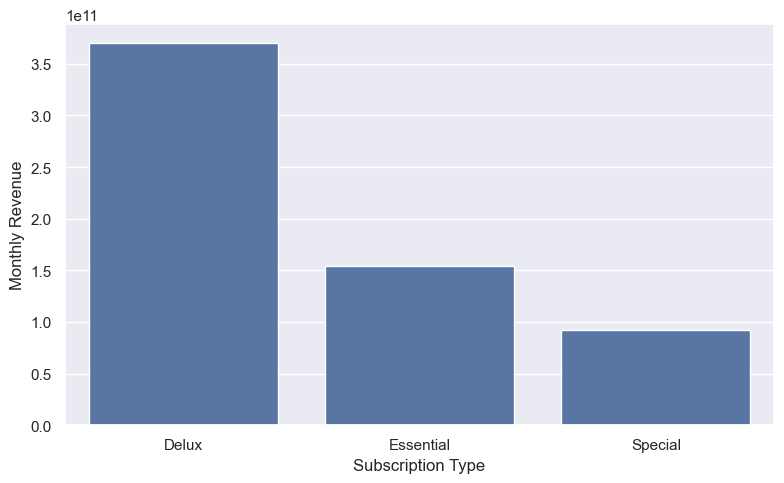

In [26]:
# 수치형 컬럼만 그룹화 대상으로 지정
st = df2.groupby('Subscription Type')[['Monthly Revenue']].sum().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=st, x='Subscription Type', y='Monthly Revenue')
plt.tight_layout()
plt.show()

In [27]:
len(df2[df2["Subscription Type"] == "Delux"])

11997374

In [28]:
len(df2[df2["Subscription Type"] == "Essential"])


5002528

In [29]:
len(df2[df2["Subscription Type"] == "Special"])

3000098

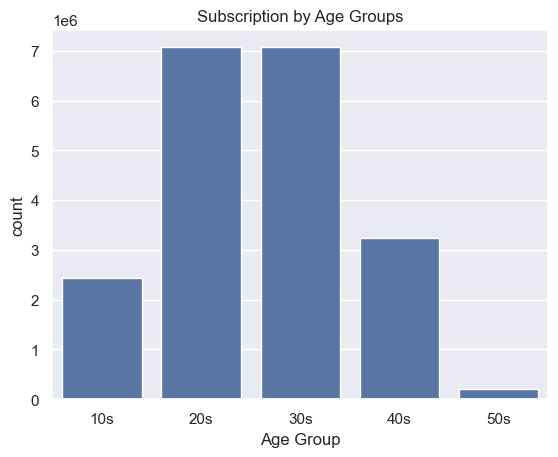

In [30]:
# 나이대 컬럼 만들기
df2["Age Group"] = pd.cut(
    df2["Age"],
    bins=[10, 19, 29, 39, 49, 59],
    labels=["10s", "20s", "30s", "40s", "50s"]
)

# 나이대별 구독 수 시각화
sns.countplot(x='Age Group', data=df2, order=["10s", "20s", "30s", "40s", "50s"])
plt.title("Subscription by Age Groups")
plt.show()


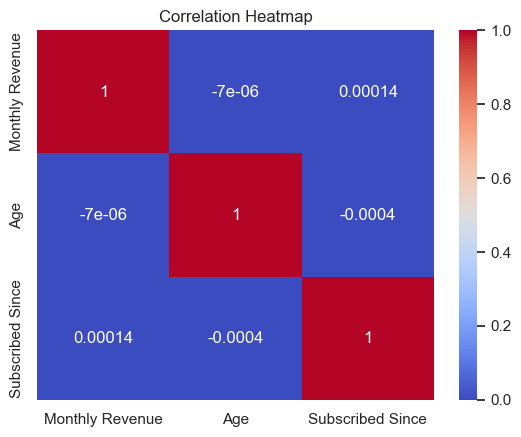

In [ ]:
df2['Join Date'] = pd.to_datetime(df2['Join Date'], format='%d-%m-%y')

df2['Subscribed Since'] = (pd.to_datetime("today") - df2['Join Date']).dt.days

cols = df2[['Monthly Revenue', 'Age', 'Subscribed Since']].corr()

sns.heatmap(cols, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()